Arbeidskrav 5 SOK-1005

kandidat: 4

Analyse av steinkjer kommune

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
#Leser inn data for Steinkjer
alder_df = pd.read_csv("steinkjer_alder.csv")
innv_df = pd.read_csv("steinkjer_innvander_bakgrunn.csv")
yrker_df = pd.read_csv("steinkjer_yrker.csv")
utdanning_df = pd.read_csv("steinkjer_utdanning.csv")
kultur_df = pd.read_csv("steinkjer_kulturmidler.csv")
bil_df = pd.read_csv("steinkjer_biltyper.csv")
utgifter_df = pd.read_csv("steinkjer_utgifter-etter-utvalgte.csv")

Oppgave 1) Steinkjer aldersdata

In [5]:
alder_df = pd.read_csv("steinkjer_alder.csv")
alder_df = alder_df.iloc[:, 0].str.split(";", expand=True)
alder_df.columns = ["Alder", "Kvinner", "Menn"]
alder_df["Kvinner"] = pd.to_numeric(alder_df["Kvinner"].str.replace(r"[^\d]", "", regex=True), errors="coerce")
alder_df["Menn"] = pd.to_numeric(alder_df["Menn"].str.replace(r"[^\d]", "", regex=True), errors="coerce")
alder_df["Antall"] = alder_df["Kvinner"] + alder_df["Menn"]

alder_df["AlderNum"] = pd.to_numeric(alder_df["Alder"].str.extract(r"(\d+)")[0], errors="coerce")
arbeidsfør = alder_df[alder_df["AlderNum"].between(20, 65)]
arbeidsfør_sum = arbeidsfør["Antall"].sum()
arbeidsfør_sum


np.int64(14520)

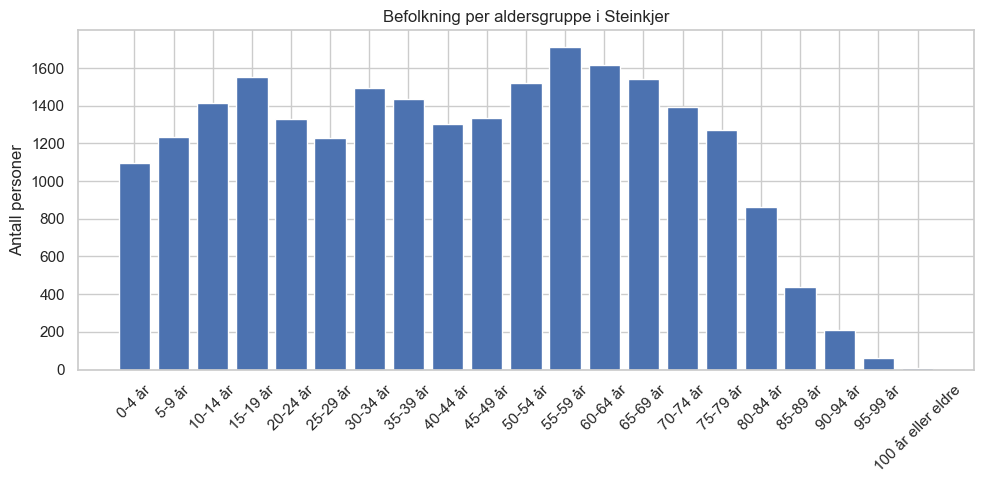

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(alder_df["Alder"], alder_df["Antall"])
plt.title("Befolkning per aldersgruppe i Steinkjer")
plt.xticks(rotation=45)
plt.ylabel("Antall personer")
plt.tight_layout()
plt.show()

Oppgave 2) Innvandrere i Steinkjer

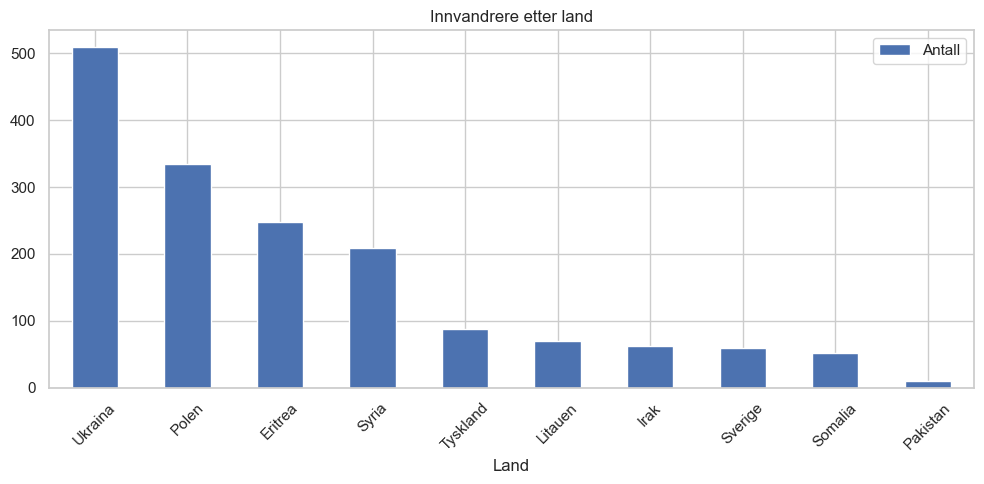

In [6]:
innv_df = innv_df.iloc[:, 0].str.split(";", expand=True)
innv_df.columns = ["Land", "Antall"]
innv_df["Antall"] = pd.to_numeric(innv_df["Antall"], errors="coerce")
innv_df_sorted = innv_df.sort_values("Antall", ascending=False)
innv_df_sorted.plot(x="Land", y="Antall", kind="bar", figsize=(10,5))
plt.title("Innvandrere etter land")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Oppgave 3) Arbeid og sysselsatte i Steinkjer

In [ ]:
yrker_df = yrker_df.iloc[:, 0].str.split(";", expand=True)
yrker_df.columns = ["Yrke", "Antall"]
yrker_df["Antall"] = pd.to_numeric(yrker_df["Antall"], errors="coerce")

total_i_arbeid = yrker_df["Antall"].sum()
utenfor = arbeidsfør_sum - total_i_arbeid
utenfor, total_i_arbeid


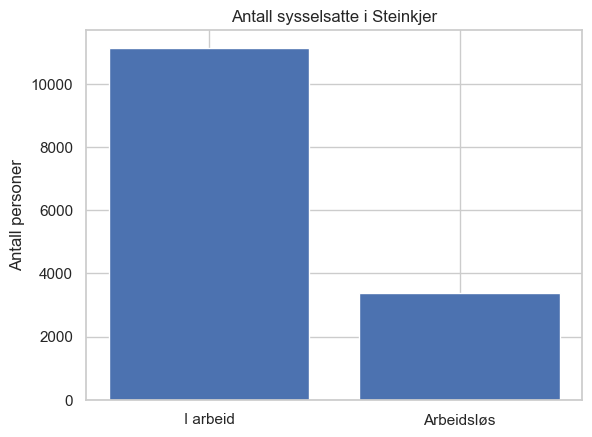

In [28]:
plt.bar(["I arbeid", "Arbeidsløs"], [total_i_arbeid, utenfor])
plt.title("Antall sysselsatte i Steinkjer")
plt.ylabel("Antall personer")
plt.show()

Oppgave 4) Utdanningsnivå i Steinkjer

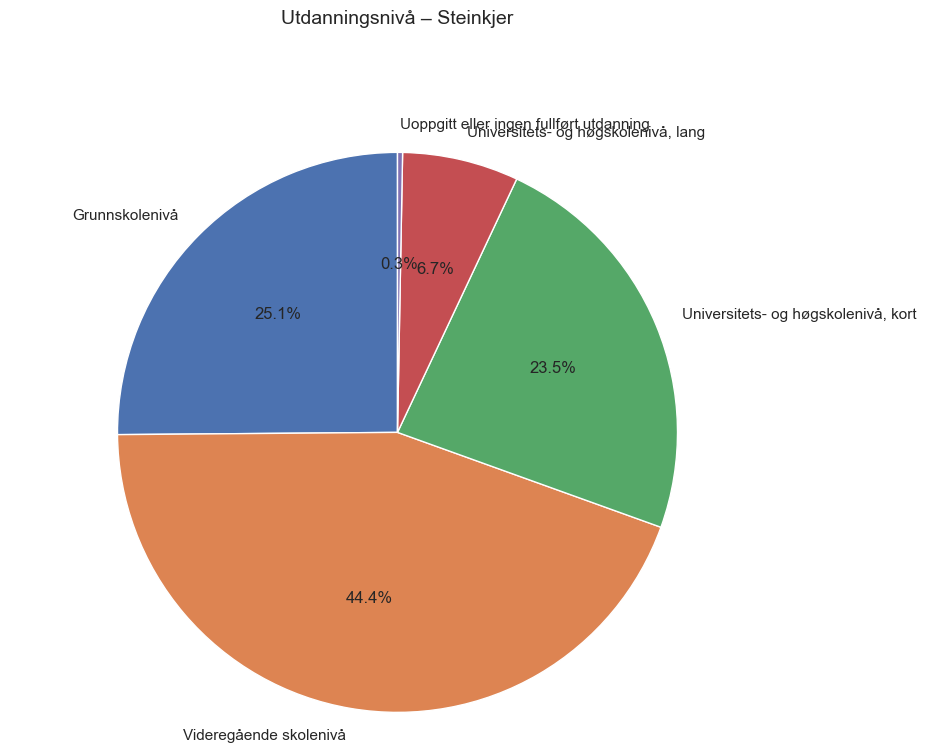

In [12]:
utdanning_df = pd.read_csv("steinkjer_utdanning.csv")
utdanning_df = utdanning_df.iloc[:, 0].str.split(";", expand=True)
utdanning_df.columns = ["Utdanningsnivå", "Antall"]
utdanning_df["Antall"] = pd.to_numeric(utdanning_df["Antall"], errors="coerce")

plt.figure(figsize=(10, 8))
plt.pie(utdanning_df["Antall"], labels=utdanning_df["Utdanningsnivå"], autopct="%1.1f%%", startangle=90)
plt.title("Utdanningsnivå – Steinkjer", fontsize=14, y=1.15)
plt.axis("equal")
plt.show()

Oppgave 5) Fordeling av kulturelle midler i Steinkjer

In [13]:
kultur_df = kultur_df.iloc[:, 0].str.split(";", expand=True)
kultur_df.columns = ["Tjenesteområde", "Beløp"]
kultur_df["Beløp"] = pd.to_numeric(kultur_df["Beløp"], errors="coerce")

total_kultur = kultur_df["Beløp"].sum()
idrett = kultur_df[kultur_df["Tjenesteområde"].str.contains("idrett", case=False)]["Beløp"].sum()
andel_idrett = idrett / total_kultur * 100
andel_idrett


np.float64(13.993399339933992)

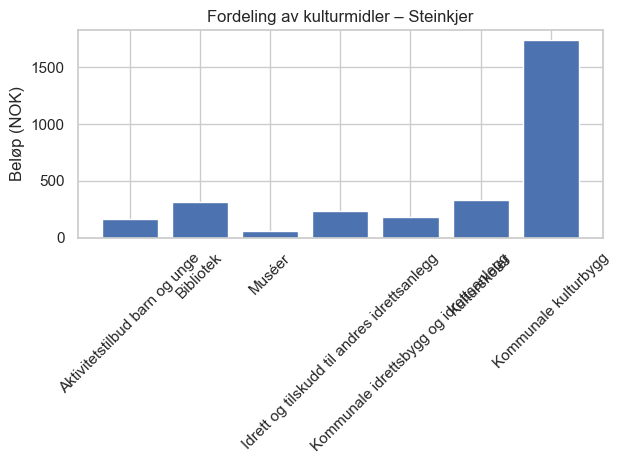

In [29]:
plt.bar(kultur_df["Tjenesteområde"], kultur_df["Beløp"])
plt.title("Fordeling av kulturmidler – Steinkjer")
plt.xticks(rotation=45)
plt.ylabel("Beløp (NOK)")
plt.tight_layout()
plt.show()

Oppgave 6) Kommunale avgifter i Steinkjer

In [14]:
utgifter_df = utgifter_df.reset_index()
utgifter_df.columns = ["Råtekst", "Ignorer"]
utgifter_df = utgifter_df["Råtekst"].astype(str).str.split(";", expand=True)
utgifter_df.columns = ["Tjenesteområde", "Beløp"]
utgifter_df["Beløp"] = pd.to_numeric(utgifter_df["Beløp"], errors="coerce")

sum_inkludert = utgifter_df["Beløp"].sum()
totalbudsjett = 3_000_000_000  # Juster dette fra SSB
mangler = totalbudsjett - sum_inkludert
prosent_mangler = mangler / totalbudsjett * 100
prosent_mangler

np.float64(99.99999746666667)

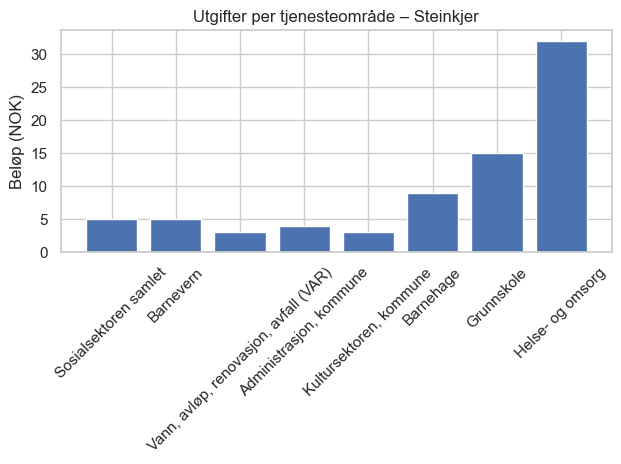

In [30]:
plt.bar(utgifter_df["Tjenesteområde"], utgifter_df["Beløp"])
plt.title("Utgifter per tjenesteområde – Steinkjer")
plt.xticks(rotation=45)
plt.ylabel("Beløp (NOK)")
plt.tight_layout()
plt.show()

Oppgave 7) Fordeling av biler i Steinkjer

In [16]:
bil_df = pd.read_csv("steinkjer_biltyper.csv")
bil_df = bil_df.iloc[:, 0].str.split(";", expand=True)
bil_df.columns = ["Drivstoff", "Antall"]
bil_df["Antall"] = pd.to_numeric(bil_df["Antall"], errors="coerce")

total_biler = bil_df["Antall"].sum()

alder_num = pd.to_numeric(alder_df["Alder"].str.extract(r"(\d+)")[0], errors="coerce")
kjørbare = alder_df[alder_num.between(20, 80)]["Antall"].sum()

biler_per_person = total_biler / kjørbare
biler_per_person

np.float64(0.7636303191489362)

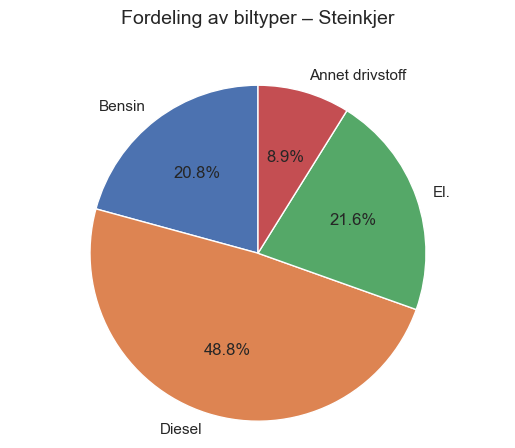

In [31]:
plt.pie(bil_df["Antall"], labels=bil_df["Drivstoff"], autopct="%1.1f%%", startangle=90)
plt.title("Fordeling av biltyper – Steinkjer", fontsize=14, y=1.1)
plt.axis("equal")
plt.show()


Oppgave 8) Visualisering på tvers av datasett 

In [ ]:
utdanning_df = pd.read_csv("steinkjer_utdanning.csv")
utdanning_df = utdanning_df.iloc[:, 0].str.split(";", expand=True)
utdanning_df.columns = ["Utdanningsnivå", "Antall"]
utdanning_df["Antall"] = pd.to_numeric(utdanning_df["Antall"], errors="coerce")

plt.figure(figsize=(10, 6))
bars = plt.bar(utdanning_df["Utdanningsnivå"], utdanning_df["Antall"])
plt.title("Utdanningsnivå – Steinkjer")
plt.ylabel("Antall personer")
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f"{int(height)}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [49]:
def vis_stolpediagram(df, xkol, ykol, tittel):
    '''
    Lager et stolpediagram med verdier over stolpene.
    '''
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df[xkol], df[ykol])
    plt.title(tittel)
    plt.xticks(rotation=45)
    plt.ylabel(ykol)

    for bar in bars:
        høyde = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, høyde + høyde * 0.01, f"{int(høyde)}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

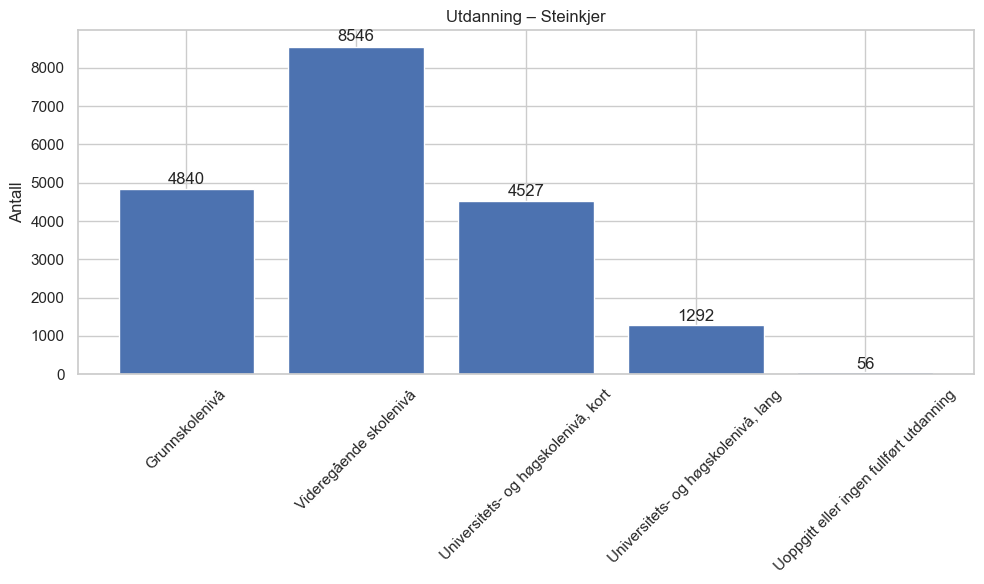

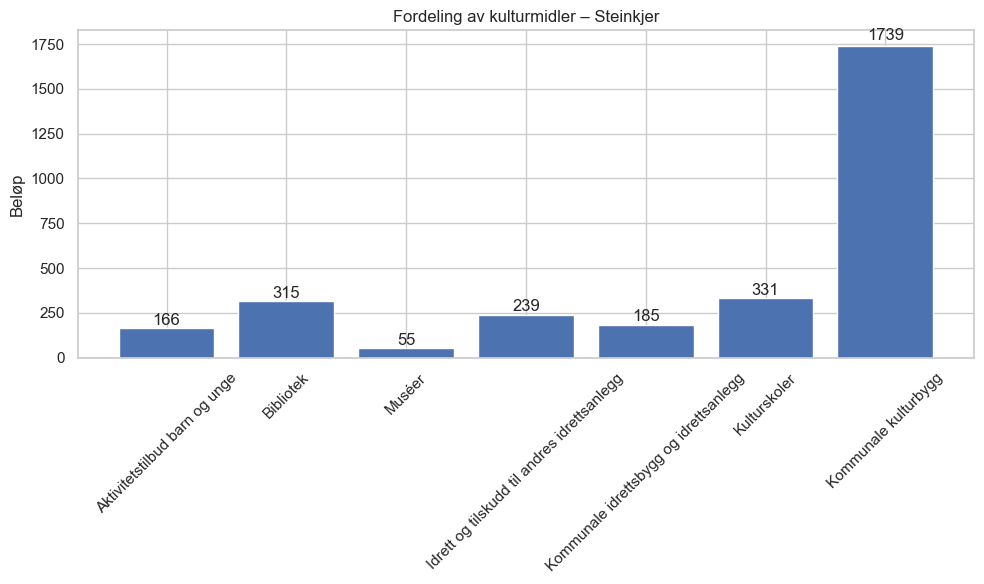

In [51]:
vis_stolpediagram(utdanning_df, "Utdanningsnivå", "Antall", "Utdanning – Steinkjer")

vis_stolpediagram(kultur_df, "Tjenesteområde", "Beløp", "Fordeling av kulturmidler – Steinkjer")

Oppgave 9) Sammenlignet med tromsø kommune

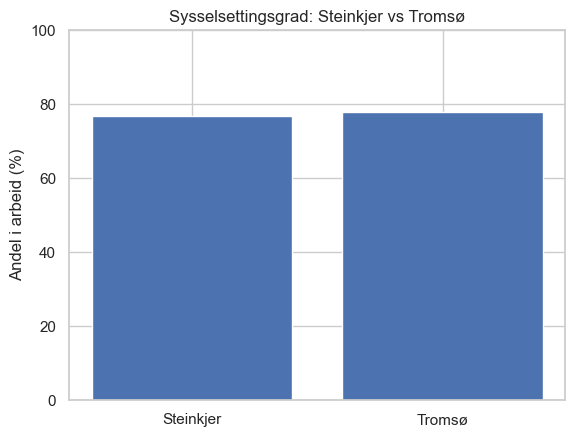

In [35]:
tromso_alder = pd.read_csv("tromso_alder.csv")
tromso_yrker = pd.read_csv("tromso_yrker.csv")
tromso_alder = tromso_alder.iloc[:, 0].str.split(";", expand=True)
tromso_alder.columns = ["Alder", "Kvinner", "Menn"]
tromso_alder["Kvinner"] = pd.to_numeric(tromso_alder["Kvinner"].str.replace(r"[^\d]", "", regex=True), errors="coerce")
tromso_alder["Menn"] = pd.to_numeric(tromso_alder["Menn"].str.replace(r"[^\d]", "", regex=True), errors="coerce")
tromso_alder["Antall"] = tromso_alder["Kvinner"] + tromso_alder["Menn"]
tromso_alder["AlderNum"] = pd.to_numeric(tromso_alder["Alder"].str.extract(r"(\d+)")[0], errors="coerce")

arbeidsfør_tromso = tromso_alder[tromso_alder["AlderNum"].between(20, 65)]["Antall"].sum()
tromso_yrker = tromso_yrker.iloc[:, 0].str.split(";", expand=True)
tromso_yrker.columns = ["Yrke", "Antall"]
tromso_yrker["Antall"] = pd.to_numeric(tromso_yrker["Antall"], errors="coerce")
i_jobber_tromso = tromso_yrker["Antall"].sum()
syssel_tromso = i_jobber_tromso / arbeidsfør_tromso * 100

syssel_steinkjer = total_i_arbeid / arbeidsfør_sum * 100

plt.bar(["Steinkjer", "Tromsø"], [syssel_steinkjer, syssel_tromso])
plt.title("Sysselsettingsgrad: Steinkjer vs Tromsø")
plt.ylabel("Andel i arbeid (%)")
plt.ylim(0, 100)
plt.show()


In [39]:
tromso_utd = pd.read_csv("tromso_utdanning.csv")
tromso_utd = tromso_utd.iloc[:, 0].str.split(";", expand=True)
tromso_utd.columns = ["Utdanningsnivå", "Antall"]
tromso_utd["Antall"] = pd.to_numeric(tromso_utd["Antall"], errors="coerce")

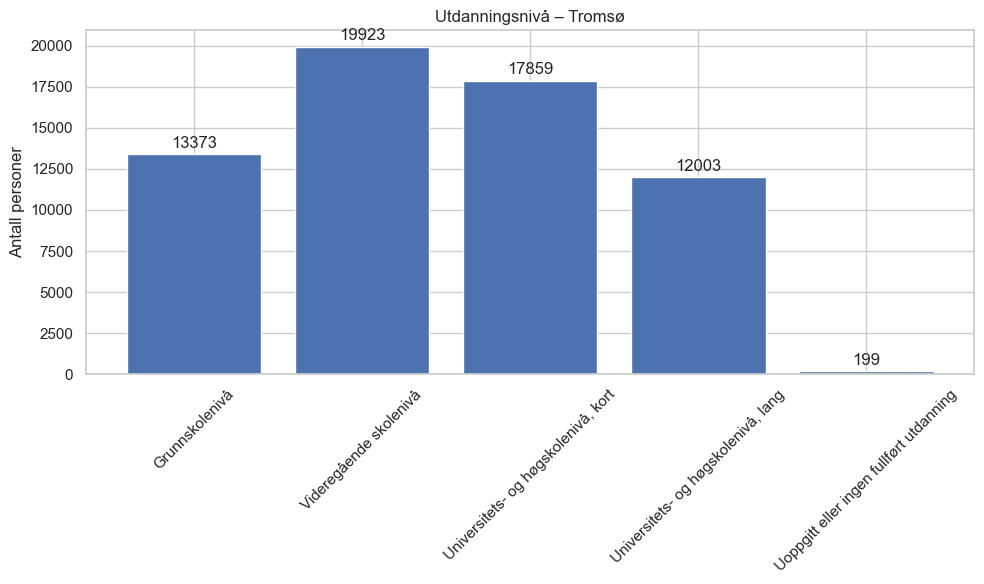

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(tromso_utd["Utdanningsnivå"], tromso_utd["Antall"])
plt.title("Utdanningsnivå – Tromsø")
plt.ylabel("Antall personer")
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 200, f"{int(height)}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

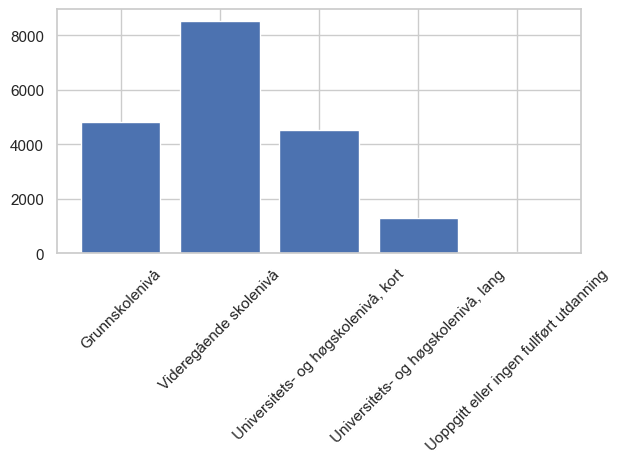

In [ ]:
#Dette er samme grafen som på oppgave 8
def lag_stolpediagram(df):
    plt.bar(df.iloc[:, 0], df.iloc[:, 1])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


lag_stolpediagram(utdanning_df)